### Analyze the dependencies in pypi metadata

#Importing the libraries needed for the project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
from networkx.drawing.nx_pydot import write_dot
from networkx.drawing.nx_pydot import write_dot
import operator

%matplotlib inline

### Reading the data using the pandas

In [3]:
data = pd.read_csv('requirements.csv')

In [4]:
data.head()

,package,requirement,package_name,package_version
0,02exercicio-1.0.0,NaN,02exercicio,1.0.0
1,0x10c-asm-0.0.2,NaN,0x10c-asm,0.0.2
2,115wangpan-0.7.6,beautifulsoup4,115wangpan,0.7.6
3,115wangpan-0.7.6,homura,115wangpan,0.7.6
4,115wangpan-0.7.6,humanize,115wangpan,0.7.6


In [5]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110104 entries, 0 to 110103
Data columns (total 4 columns):
package            110104 non-null object
requirement        73773 non-null object
package_name       108871 non-null object
package_version    108872 non-null object
dtypes: object(4)
memory usage: 3.4+ MB


In [6]:
### Null values and the visulaization of it
data.isna().sum()

package                0
requirement        36331
package_name        1233
package_version     1232
dtype: int64

In [7]:
import missingno as ms

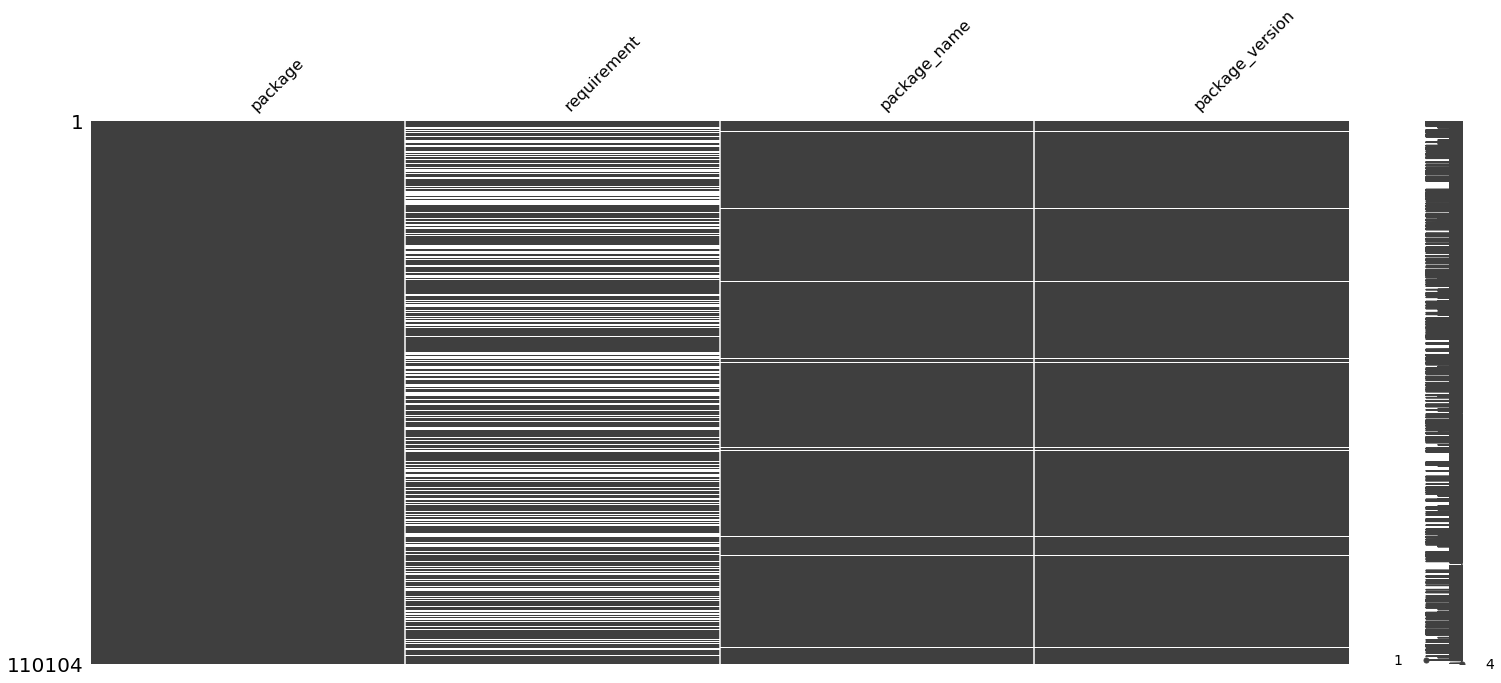

In [8]:
ms.matrix(data)
# White spaces represents the null values.

### About the networkx package
NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. Pygraphviz is a Python interface to the Graphviz graph layout and visualization package. Python language data structures for graphs, digraphs, and multigraphs.

In [4]:
edges = data.loc[data.requirement.notnull(), ['package_name', 'requirement']].values
edges


array([['115wangpan', 'beautifulsoup4'],
       ['115wangpan', 'homura'],
       ['115wangpan', 'humanize'],
       ...,
       ['zymbit-trequests', 'tornalet'],
       ['zzzeeksphinx', 'mako'],
       ['zzzeeksphinx', 'pyscss']], dtype=object)

In [10]:
df = data

In [5]:
def make_graph(df, min_edges=0):
    DG = nx.DiGraph()
    DG.add_nodes_from(df.package_name.unique())
    edges = df.loc[df.requirement.notnull(), ['package_name', 'requirement']].values
    DG.add_edges_from(edges)
    
    # Remove bad nodes
    DG.remove_nodes_from(['.', 'nan', np.nan])
    

    to_remove = [n for n in DG if DG.degree(n) <= min_edges]
    DG.remove_nodes_from(to_remove)
    return DG

In [12]:
from networkx.drawing.nx_pydot import write_dot


In [15]:
DG =make_graph(data, min_edges= 10)
write_dot(DG, 'requirement_graph.dot')

<img src = 'requirement_graph.dot'/>

In [19]:
DG.nodes

NodeView(('abilian-core', 'abilian-sbe', 'AccessControl', 'adminish', 'ageliaco.rd2', 'aiohttp', 'airflow', 'aj', 'ajenti', 'ajenti.plugin.core', 'alabaster', 'aldryn-blog', 'aldryn-cms', 'aldryn-django', 'aldryn-faq', 'aldryn-newsblog', 'aldryn-people', 'alembic', 'algobroker', 'alignak', 'alignak_webui', 'AllSpeak', 'aloe', 'aloe_django', 'amibaker', 'amo-validator', 'amphipathic', 'amqp', 'angr', 'anhima', 'anitya', 'ansible', 'anyconfig', 'anyjson', 'anytemplate', 'apache-libcloud', 'appdirs', 'AppValidationAutomation', 'arches', 'argcomplete', 'argh', 'argparse', 'arrow', 'arsenal-director', 'askbot', 'askbot-tuan', 'asm.cms', 'asm.cmsui', 'assemblycoins', 'astroid', 'astropy', 'astropy-helpers', 'asv_meta', 'asyncio', 'asynx-core', 'asynxd', 'atramhasis', 'attrdict', 'augeias', 'Authcode', 'authentic2', 'autobahn', 'Automated-Lazy-Unit-Testing-in-Python', 'automaton', 'ava', 'avalonms', 'awscli', 'backy', 'bamboo-data', 'bamboo-server', 'bambu-tools', 'bandit', 'baremetal-network

In [6]:
dep_graph = make_graph(data, min_edges= 0)
len(dep_graph.node)
dep_graph


### Statistic Plots

### 1. Histogram on number of connections on the top several Packages

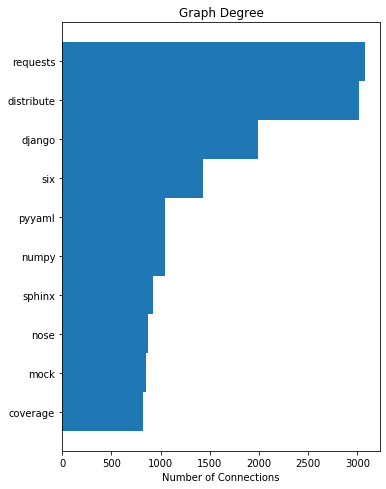

In [23]:
sorted_dict = sorted(dep_graph.in_degree(), key=operator.itemgetter(1))[::-1]
n = 10
x = np.arange(10)
y = np.array([d[1] for d in sorted_dict[:n]])
xlabels = [d[0] for d in sorted_dict[:n]][::-1]
fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.barh(x[::-1], y, height = 1)
ax.set_yticks(x)
_ = ax.set_yticklabels(xlabels)
ax.set_xlabel('Number of Connections')
ax.set_title('Graph Degree')
fig.subplots_adjust(left=0.27, bottom=0.1, top=0.95)

## PageRank

Similar to the node degree, but with some extra magic.
Return the PageRank of the nodes in the graph.

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

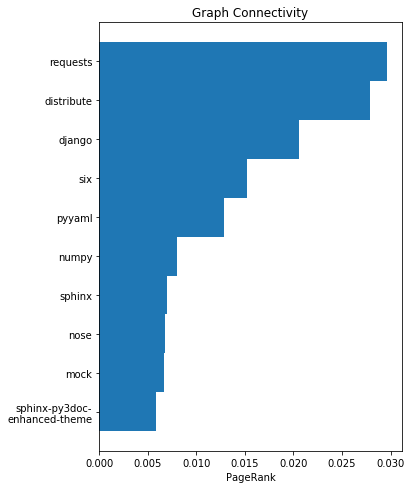

In [24]:
pagerank = nx.link_analysis.pagerank(dep_graph)
sort_list = sorted(pagerank.items(), key=operator.itemgetter(1))[::-1]
fig, ax = plt.subplots(1,1, figsize = (7,7))
n= 10
x =np.arange(n)
y = [d[1] for d in sort_list[:n]]
xlabels = [d[0] for d in sorted_dict[:n]][::-1]
xlabels[0] = 'sphinx-py3doc-\nenhanced-theme'
ax.set_yticks(x)
ax.barh(x[::-1], y , height = 1)
_ = ax.set_yticklabels(xlabels)
ax.set_xlabel('PageRank')
ax.set_title('Graph Connectivity')
fig.subplots_adjust(left=0.30, bottom=0.1, top=0.95)


# Degree Distribution
A random graph has a ~gaussian distribution of degrees (the number of connections to each node). Social network-type graphs are more exponential/power law with most nodes having a few connections and a few having LOTS of connections. What does this one look like?

In [25]:
import operator

In [33]:
import operator
def centrality_measure(dic):
    return sorted(dic.items(), key = lambda x: x[1], reverse = True)

#### Which node has the highest degree centrality ?
(Degree centrality : How many no. of connections does the each node have.)

[('sphinx', 0.23209751142712035), ('coverage', 0.22295581513458607), ('six', 0.2061960385982732), ('mock', 0.2036566785170137), ('requests', 0.18638902996444895), ('distribute', 0.16556627729812087), ('hacking', 0.12899949212798373), ('pbr', 0.1254443880142204), ('testtools', 0.11681056373793804), ('zope.interface', 0.11274758760792279)]


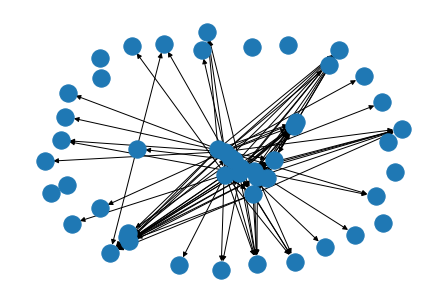

In [36]:
#Degree Centrality
degree_cent = nx.degree_centrality(DG)
degree_sorted = centrality_measure(degree_cent)
print(degree_sorted[:10])

#Grpah 
highest_degree = [n[0] for n in degree_sorted[:50]]
sub  = DG.subgraph(highest_degree)
nx.draw(sub)


### Betweenness Centrality ?
This metric is measured with the number of shortest paths

In [40]:
bet_degree_cent = nx.betweenness_centrality(DG)
bet_degree_sorted = centrality_measure(bet_degree_cent)
bet_degree_sorted[:10]

[('pbr', 0.0018166434981972917),
 ('mock', 0.001573888470190449),
 ('oslotest', 0.001249133537861489),
 ('hacking', 0.0012171887671533865),
 ('requests', 0.0009471660458294757),
 ('python-keystoneclient', 0.0008944508993476838),
 ('os-client-config', 0.0008659546155946153),
 ('oslosphinx', 0.0005067906792252288),
 ('testtools', 0.0005029551276388689),
 ('tempest-lib', 0.0003791907609676782)]

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


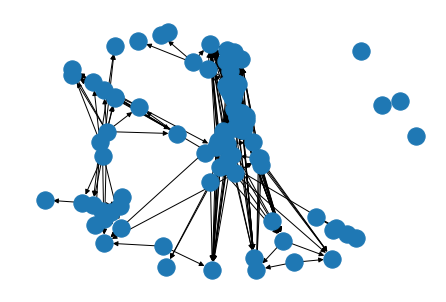

In [41]:
bet_sub = [n[0] for n in bet_degree_sorted[:100]]
sub_bet = DG.subgraph(bet_sub)
nx.draw(sub_bet)

### Closeness Centrality
Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


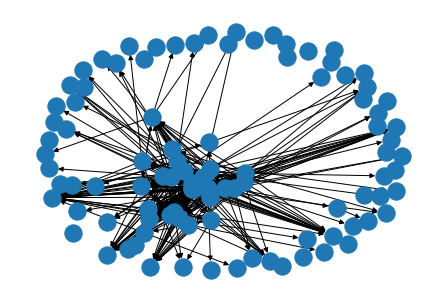

In [39]:
clo_degree_cent = nx.closeness_centrality(DG)
clo_degree_sorted = centrality_measure(clo_degree_cent)
clo_degree_sorted[:10]

sub_graph = [n[0] for n in clo_degree_sorted[:100]]
sub_cc = DG.subgraph(sub_graph)
nx.draw(sub_cc)

### In-degree Centrality

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


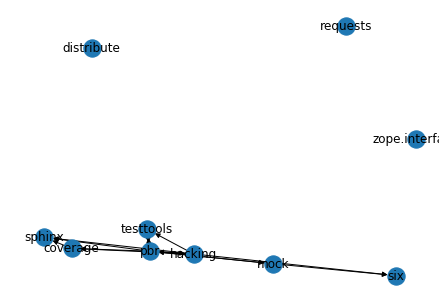

In [50]:
# The in-degree centrality for a node v is the fraction of nodes its incoming edges are connected to.#
in_degree_centality = nx.in_degree_centrality(DG)
in_degree_sort = centrality_measure(in_degree_centality)
in_degree_sort[:10]

# Grpah 
in_degree = [n[0] for n in in_degree_sort[:10]]
sub3 = DG.subgraph(in_degree)
nx.draw(sub3, with_labels = True)


### Out-Degree Centrality

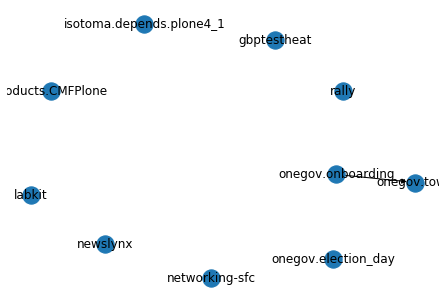

In [51]:
# The out-degree centrality for a node v is the fraction of nodes its outgoing edges are connected to.
out_degree_centality = nx.out_degree_centrality(DG)
out_degree_sort = centrality_measure(out_degree_centality)
out_degree_sort[:10]

# Grpah 
out_degree = [n[0] for n in out_degree_sort[:10]]
sub2 = DG.subgraph(out_degree)
nx.draw(sub2, with_labels = True)



### Comunity Graphs

Girran newtown techinque for the detection and analysis of community strcture depends upon the iterative elimination the edges with the higest number of shortest paths that pass through it

#### Steps for calculating the communities
1. Calculate edge_betweeeness_centrality of the every edge in the graph
2. Remove the edge with higest edge_between_centrality.
3. Calculate the edge_between_centrality of the remaining edges
4. Connected components are the communities

It returns the communities which have the shortest path or the betweeness_centrality

In [34]:
def edge_to_remove(g):
    dic = nx.edge_betweenness_centrality(g)
    list_tuple_sort = centrality_measure(dic)
    return list_tuple_sort[0][0]
def girran(g):
    # to check whether the data is connected to subgraphs or not.
    c= list(nx.connected_component_subgraphs(g))
    l = len(c)
    print(l)
    while (l ==1):
        g.remove_edge(*edge_to_remove(g)) # * is used to return the values not tuple of values
        c = list(nx.connected_component_subgraphs(g))
        l = len(c)
        print(l)
    return c
    

In [8]:
dg = nx.to_undirected()

NameError: name 'DG' is not defined

### Is this a small-world graph?

Compute both the average path length and the clustering coefficient. Small worlds have large clustering coefficients and small average path lengths.

In [ ]:
avg_pathlen = []
subgraph_size = []
for subgraph in nx.connected_component_subgraphs(dep_graph.to_undirected()):
    n = len(subgraph)
    if n > 1:
        subgraph_size.append(n)
        avg_pathlen.append(nx.average_shortest_path_length(subgraph))

avg_clustering = nx.average_clustering(dep_graph.to_undirected())
apl = np.average(avg_pathlen, weights=subgraph_size)
print(apl, avg_clustering)

So I'm not sure... by the definition above, the clustering coefficient seems to be quite small. That means that node neighborhoods are not connected anywhere near as much as they could be, and that this is NOT a small-world graph. On the other hand, the average path length  L∼logN , which is another definition of a small-world graph. I guess these could be reconciled if there are a few very very important nodes that act as hubs, but the "spokes" that come out of the hubs are relatively independent. Those hubs appear to be requests and django, and maybe six.

In [13]:
def edge_to_remove(G):
    dic1 = nx.edge_betweenness_centrality(G)
    
    list_tuple = sorted(dic1.items(), key = operator.itemgetter(1), reverse = True)
    return list_tuple[0][0]
def girvan(G):
    c = nx.connected_component_subgraphs(G)
    l = len(c)
    print(l)
    while l ==1:
        G.remove_edges(*edge_to_remove(G))
        c =nx.connected_component_subgraphs(G)
        l = len(c)
        print(l)
    return c.number_of_edges()

c = girran(graph)

for i in c:
    print(i.nodes())

NameError: name 'girran' is not defined

In [9]:
graph = dep_graph.to_undirected()